In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
'''%matplotlib inline'''

'%matplotlib inline'

In [20]:
#https://drive.google.com/file/d/1LP7dGilYgwOzx3Ukex2aW3PwDjMGGAgv/view?usp=sharing
file_id = '1LP7dGilYgwOzx3Ukex2aW3PwDjMGGAgv'
link = f'https://drive.google.com/uc?id={file_id}'
bank = pd.read_csv(link)
bank

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0.0,0.0,1.0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0.0,0.0,1.0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0.0,0.0,0.0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0.0,0.0,0.0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0.0,0.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0.0,0.0,0.0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85.0,0.0,0.0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0.0,0.0,0.0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0.0,0.0,0.0,0,1,0


In [21]:
bank.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              2
Personal Loan         1
Securities Account    1
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [22]:
c_impute = SimpleImputer(missing_values= np.nan, strategy = 'most_frequent')
bank[['Mortgage','Personal Loan','Securities Account']] = c_impute.fit_transform(bank[['Mortgage','Personal Loan','Securities Account']])

In [23]:
bank.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

<Axes: title={'center': 'Heatmap showing Correlation between all the features'}>

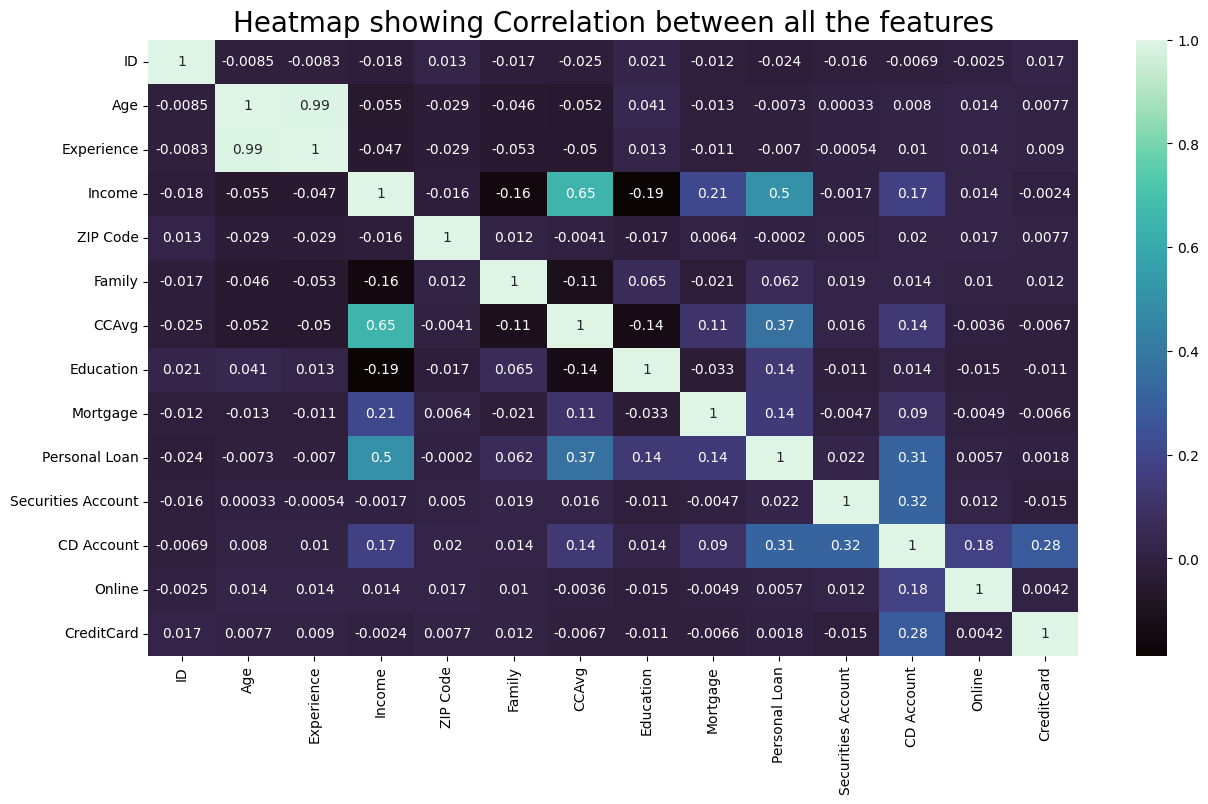

In [24]:
plt.figure(figsize=(15,8))
plt.title("Heatmap showing Correlation between all the features", fontsize=20)
sns.heatmap(bank.corr(),annot = True, cmap='mako')

In [25]:
df = bank.drop(["ID","ZIP Code"], axis = 1)
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0.0,0.0,1.0,0,0,0
1,45,19,34,3,1.5,1,0.0,0.0,1.0,0,0,0
2,39,15,11,1,1.0,1,0.0,0.0,0.0,0,0,0
3,35,9,100,1,2.7,2,0.0,0.0,0.0,0,0,0
4,35,8,45,4,1.0,2,0.0,0.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0.0,0.0,0.0,0,1,0
4996,30,4,15,4,0.4,1,85.0,0.0,0.0,0,1,0
4997,63,39,24,2,0.3,3,0.0,0.0,0.0,0,0,0
4998,65,40,49,3,0.5,2,0.0,0.0,0.0,0,1,0


In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit(df.drop('CreditCard',axis=1)).transform(df.drop('CreditCard',axis=1))
df_scaled = pd.DataFrame(scaled, columns=df.columns[:-1])
df_scaled.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online
0,-1.774417,-1.666078,-0.538229,1.397414,-0.193385,-1.049078,-0.555017,-0.3255,2.932052,-0.25354,-1.216618
1,-0.029524,-0.096330,-0.864109,0.525991,-0.250611,-1.049078,-0.555017,-0.3255,2.932052,-0.25354,-1.216618
2,-0.552992,-0.445163,-1.363793,-1.216855,-0.536736,-1.049078,-0.555017,-0.3255,-0.341058,-0.25354,-1.216618
3,-0.901970,-0.968413,0.569765,-1.216855,0.436091,0.141703,-0.555017,-0.3255,-0.341058,-0.25354,-1.216618
4,-0.901970,-1.055621,-0.625130,1.397414,-0.536736,0.141703,-0.555017,-0.3255,-0.341058,-0.25354,-1.216618


In [27]:
x = df_scaled
y = df['CreditCard']

x.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online
0,-1.774417,-1.666078,-0.538229,1.397414,-0.193385,-1.049078,-0.555017,-0.3255,2.932052,-0.25354,-1.216618
1,-0.029524,-0.096330,-0.864109,0.525991,-0.250611,-1.049078,-0.555017,-0.3255,2.932052,-0.25354,-1.216618
2,-0.552992,-0.445163,-1.363793,-1.216855,-0.536736,-1.049078,-0.555017,-0.3255,-0.341058,-0.25354,-1.216618
3,-0.901970,-0.968413,0.569765,-1.216855,0.436091,0.141703,-0.555017,-0.3255,-0.341058,-0.25354,-1.216618
4,-0.901970,-1.055621,-0.625130,1.397414,-0.536736,0.141703,-0.555017,-0.3255,-0.341058,-0.25354,-1.216618


In [28]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: CreditCard, dtype: int64

SVM

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [30]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC()
svc.fit(x_train, y_train)
y_pred=svc.predict(x_test)
print('Model accuracy : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy : 0.749


In [31]:
rbf_svc=SVC(kernel='rbf').fit(x_train,y_train)
y_pred = rbf_svc.predict(x_test)
print('Model accuracy with rbf kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy with rbf kernel : 0.749


In [32]:
predicted = svc.predict(x_test)

In [33]:
print('Accuracy =', svc.score(x_test,y_test)*100)

Accuracy = 74.9


In [34]:
dataf = {'Predicted': y_pred, 'Actual': y_test}
pd.DataFrame(dataf)

,Predicted,Actual
398,0,0
3833,0,0
4836,0,1
4572,0,0
636,0,0
...,...,...
4228,0,0
2367,0,1
788,0,0
1452,0,0


In [36]:
import pickle
pickle.dump(svc, open('bank_model.pkl', 'wb'))

model = pickle.load(open('bank_model.pkl','rb'))
print(model.predict([[42, 18, 81, 4, 2.4, 3, 1, 0, 0, 0, 0]]))

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
